In [1]:
import pandas as pd
import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
df = pd.read_csv(r"C:\Users\isaac\Downloads\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [7]:
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':1,'semi-furnished':2,'unfurnished':0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 55.5+ KB


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
cols_to_plot = df.drop('price',axis='columns')
def scatter(cols_to_plot):
    for cols in cols_to_plot:
        plt.scatter(df[cols],df['price'])
        plt.title(f'{cols} vs price')
        plt.xlabel(cols)
        plt.ylabel('Price')
        plt.show()

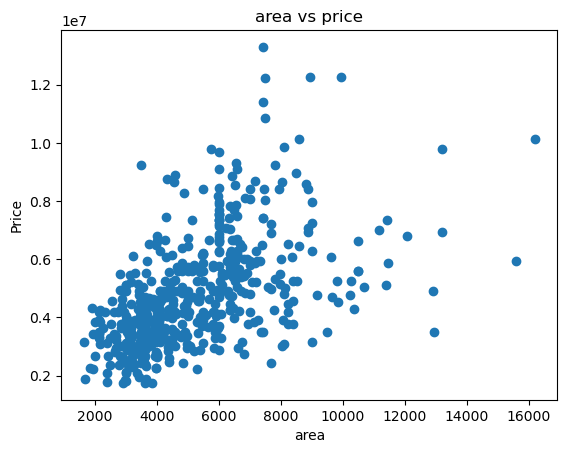

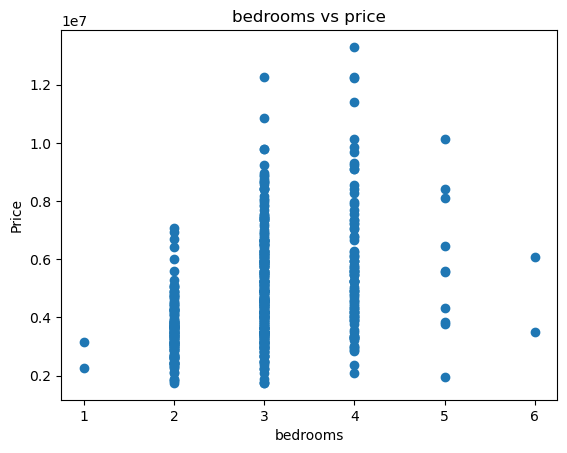

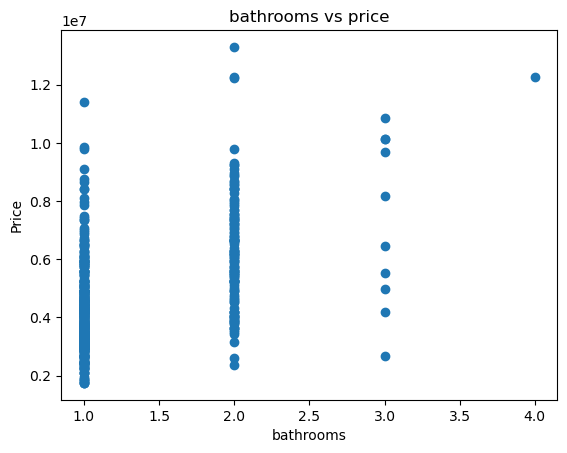

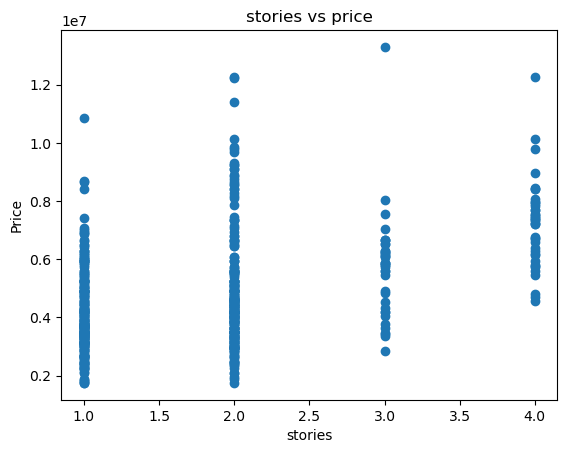

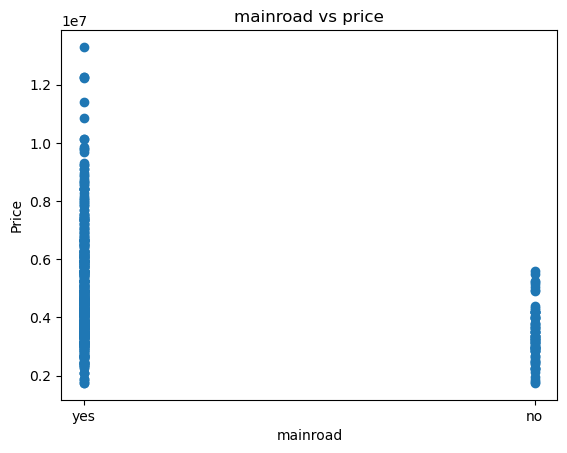

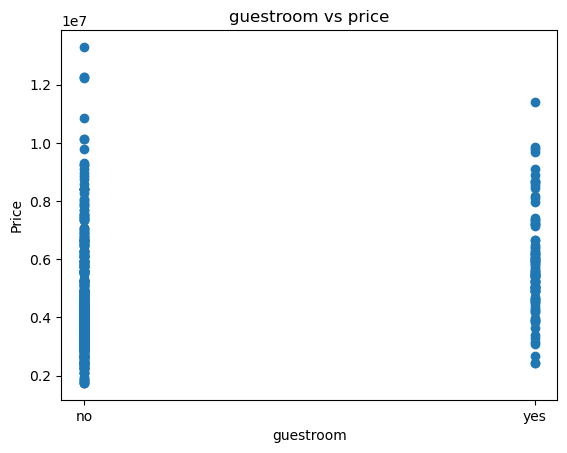

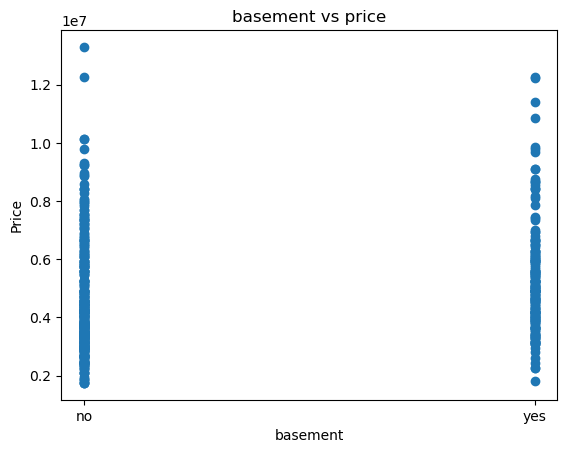

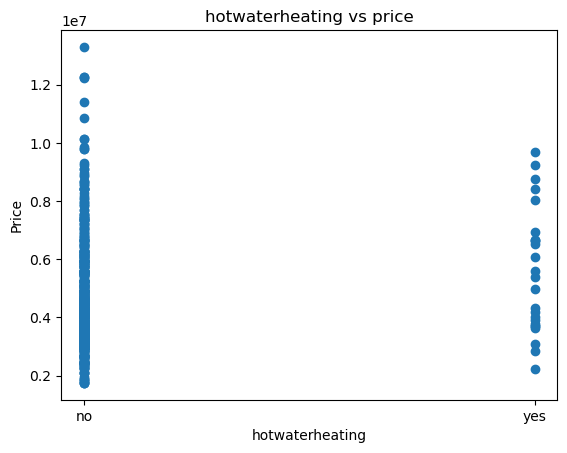

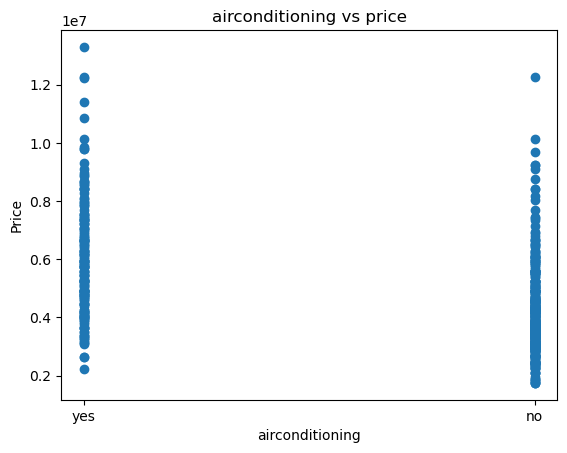

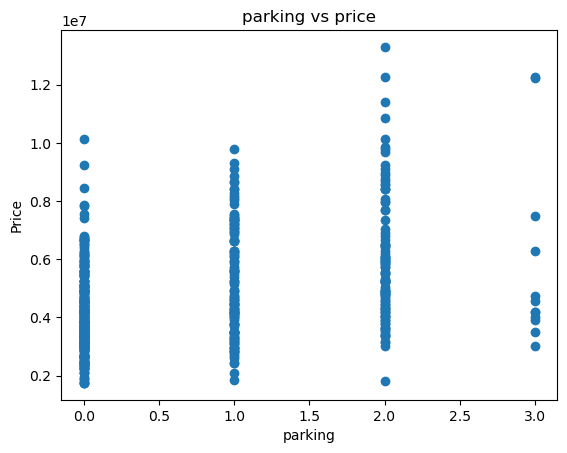

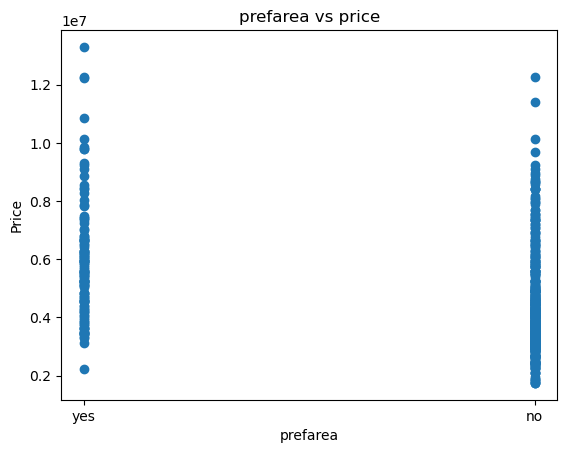

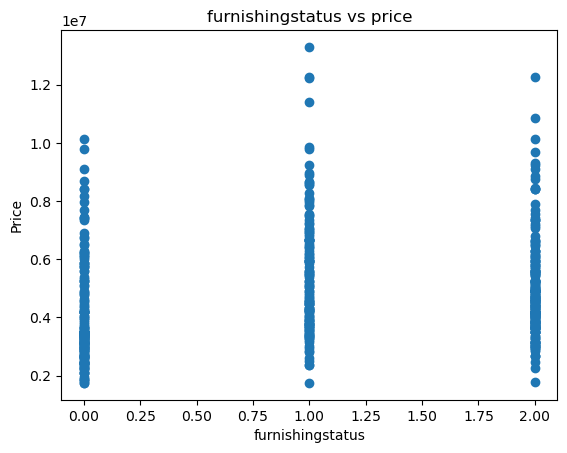

In [11]:
scatter(cols_to_plot)

In [12]:
cols_to_encode = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [13]:
for cols in cols_to_encode:
    df[cols]=df[cols].replace({'yes':1,'no':0})

In [14]:
# df.drop(cols_to_encode,axis='columns')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [15]:
correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

In [16]:
correlation_with_price

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
furnishingstatus    0.190086
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler

x=df.drop('price',axis='columns')
y=df['price']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [19]:
model = cross_val_score(LinearRegression(),x_train,y_train,cv=5,n_jobs=5)

In [20]:
model

array([0.69873735, 0.68052919, 0.60871001, 0.6097887 , 0.61888998])

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.score(x_test,y_test)

0.6542221839581829

In [24]:
y_pred = model.predict(x_test)

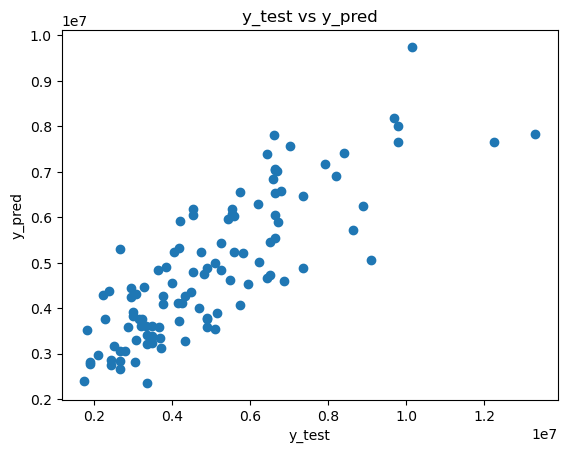

In [25]:
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
print(mean_squared_error(y_test,y_pred))

1747758260816.2183
